# Task 2:

The following code can be used in python to determine the machine accuracy ε (or Machine epsilon):

```
import numpy as np
numprec=1.0
while 1<np.float32(1+numprec): # Check sum with single precision
# while 1<1+numprec: # Check sum with double precision
numprec*=0.5
numprec*=2
```

1. Determine ε using the above code, both for single and double precision. A double precision number
uses 8 bytes of storage, whereas a single precision number only occupies 4 bytes.
2. Give a definition of the machine accuracy based on the code above (use words and not mathematical
expression)

In [36]:
import numpy as np

# Divide 1 by 2 repeatedly until it is equivalent to 0 according to 32 bit floating point values
numprec_single = 1.0
while 1<np.float32(1+numprec_single): #single
    numprec_single*=0.5
numprec_single*=2
print(f'Machine epsilon (Single, 4 bytes):{numprec_single}')

# Divide 1 by 2 repeatedly until it is equivalent to 0 according to a double floating point value
numprec_double = 1.0
#while 1<np.float32(1+numprec): #single
while 1<1+numprec_double: #double
    numprec_double*=0.5
numprec_double*=2
print(f'Machine epsilon (Double, 8 bytes):{numprec_double}')

Machine epsilon (Single, 4 bytes):1.1920928955078125e-07
Machine epsilon (Double, 8 bytes):2.220446049250313e-16


# Task 3

### Given:

Approximation of a derivative given by the centered difference scheme:
$$f'_n(x) = \frac{f(x+\Delta x) - f(x - \Delta x)}{2\Delta x}$$

The estimate of the relative discretization error:
$$\epsilon _d = |\frac{f'(x) - f'_n(x)}{f'(x)}|$$

Let $x = 2$, $\Delta x = 10^{-20} \cdots 10^0$ 

### Find:

Use the centered difference scheme to compute the relative discretization error of the function:
$$f(x) = \frac{1}{2+x} + x^2$$

Plot $\epsilon _d$ vs. $\Delta x$ on a log-log plot


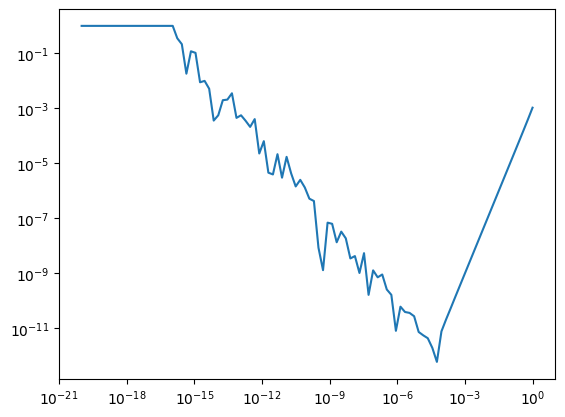

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

exponents = np.linspace(-20, 0, 100)
delta_x = [np.float64(10**n) for n in exponents]

# Define the function
def f(x):
    return 1/(2+x) + x**2

# Define the function for array parameters
def f_array(x):
    return [f(x_n) for x_n in x]

# Analytic derivative for f(x)
def dfdx(x):
    return -1/(2+x)**2 + 2*x

# Analytic derivative defined for arrays
def dfdx_array(x):
    return [dfdx(x_n) for x_n in x]

# Numeric centered difference scheme
def dfdx_n(x, delta_x):
    return ( f(x+delta_x) - f(x-delta_x) ) / (2 * delta_x)

# Numeric derivative for single value of x and array of delta_x values
def dfdx_n_array(x, delta_x):
    return [dfdx_n(x, delta_x_n) for delta_x_n in delta_x]

# Analytic 2nd Derivate for f(x)
def d2fdx2(x):
    return 2/(2+x)**3 + 2

# Analytic 3rd Derivate for f(x)
def d3fdx3(x):
    return -6/(2+x)**4

# Relative discretion error
e_d = np.abs( ( np.ones(len(delta_x))*dfdx(2.0) - dfdx_n_array(2.0, delta_x) ) / dfdx(2.0) )
#print(e_d)

plt.loglog(delta_x, e_d)

Discussion of this figure.

Use the following analytically derived equations for the error and plot the total, propagated, and discretization errors on a loglog plot:

$$\xi _p^2 = (\frac{f(x) \epsilon}{f'(x)\sqrt{2}\Delta x})^2$$

$$\xi _d = \frac{\Delta x^2 |f'''(x)|}{6|f'(x)|}$$

Text(0, 0.5, 'Error')

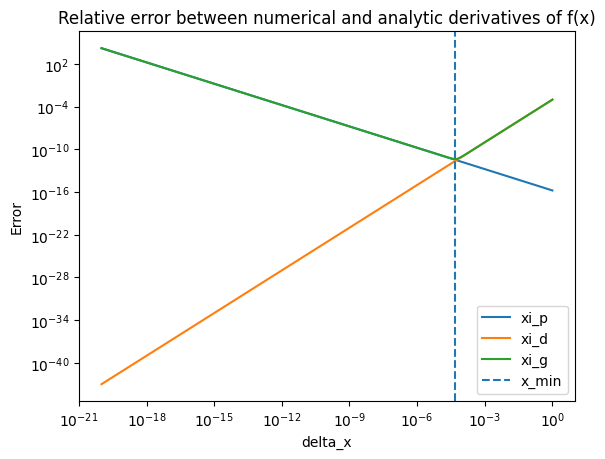

In [49]:
delta_x = np.array(delta_x)
xi_p = np.divide(f(2) * numprec_double, dfdx(2) * np.sqrt(2) * delta_x)
xi_d = np.divide(delta_x * delta_x * np.abs(d3fdx3(2)), 6 * np.abs(dfdx(2)))
xi_g = np.sqrt(xi_p*xi_p + xi_d*xi_d)

plt.figure()
plt.loglog(delta_x, xi_p)
plt.loglog(delta_x, xi_d)
plt.loglog(delta_x, xi_g)

# The minimum should occur at delta_x_min
delta_x_min = np.cbrt(np.abs(np.divide(6 * f(2) * numprec_double, 2 * d3fdx3(2))))

plt.axvline(delta_x_min, linestyle='--')

plt.legend(["xi_p", "xi_d", "xi_g", "x_min"])

plt.title("Relative error between numerical and analytic derivatives of f(x)")
plt.xlabel("delta_x")
plt.ylabel("Error")

Discussion of this figure.